### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from plotnine import *
from sklearn import datasets
import sklearn

### Loading Datasets

In [2]:
n_samples = 1500
dataset1 = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset1 = pd.DataFrame(dataset1[0])

dataset2 = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)
dataset2 = pd.DataFrame(dataset2[0])

dataset3 = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8)
dataset3 = pd.DataFrame(dataset3[0])

dataset4 = np.random.rand(n_samples, 2), None
dataset4 = pd.DataFrame(dataset4[0])

dataset5 = pd.read_csv("dataset5.csv", header=None)
dataset6 = pd.read_csv("dataset6.csv", header=None)
dataset7 = pd.read_csv("dataset7.csv", header=None)
dataset8 = pd.read_csv("dataset8.csv")
dataset9 = pd.read_csv("dataset9.csv")

In [3]:
datasets = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6, dataset7, dataset8, dataset9]
for dataset in datasets[:-2]:
    dataset.columns = ['x', 'y']

### Data Normalization and Visualization

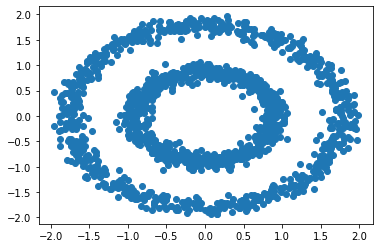

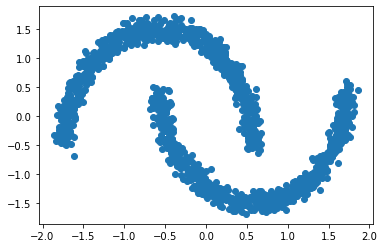

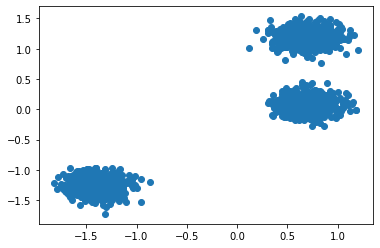

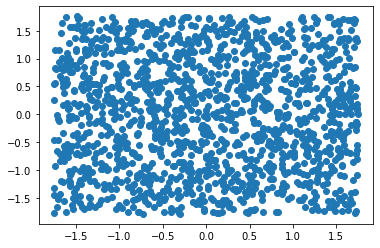

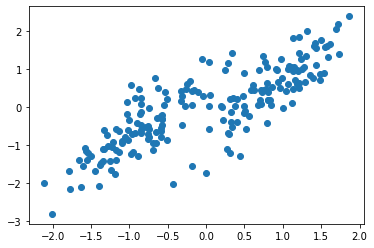

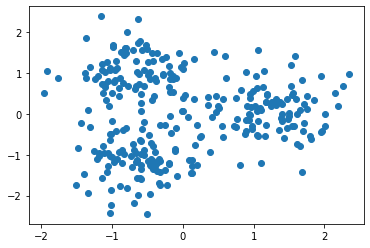

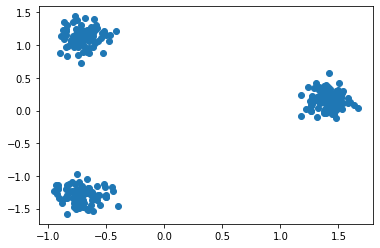

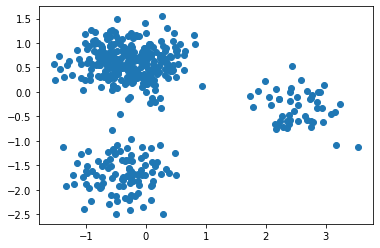

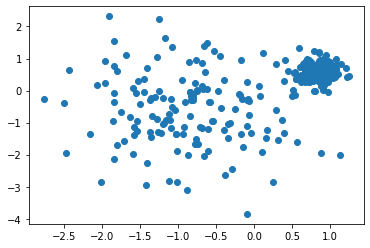

In [4]:
ss = StandardScaler()

for dataset in datasets:
    dataset[["x","y"]] = ss.fit_transform(dataset)
    plt.scatter(dataset['x'], dataset['y'])
    plt.show()

### Implementing KMean, Hierarchical and DBSCAN Clustering

In [5]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans

In [6]:
def do_it(dataset, kmeans_n_cluster, hierarical_n_cluster, hierarical_linkage, DBSCAN_eps, DBSCAN_min_samples):
    kmeans=KMeans(n_clusters=kmeans_n_cluster)
    kmeans.fit(dataset)
    plt.title('K-Means')
    sns.scatterplot(x='x',y='y',data=dataset,c=kmeans.labels_);

    plt.figure()
    agg=AgglomerativeClustering(n_clusters=hierarical_n_cluster, linkage=hierarical_linkage)
    agg.fit(dataset)
    plt.title('Hierarical')
    sns.scatterplot(x='x',y='y',data=dataset,c=agg.labels_);

    plt.figure()
    dbscan=DBSCAN(eps=DBSCAN_eps, min_samples=DBSCAN_min_samples)
    dbscan.fit(dataset)
    plt.title('DBSCAN')
    sns.scatterplot(x='x',y='y',data=dataset,c=dbscan.labels_);

## Data 1

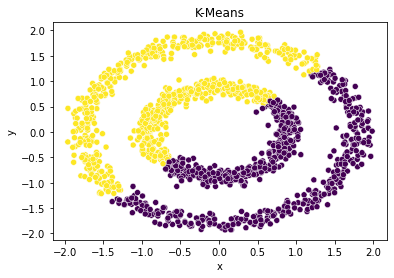

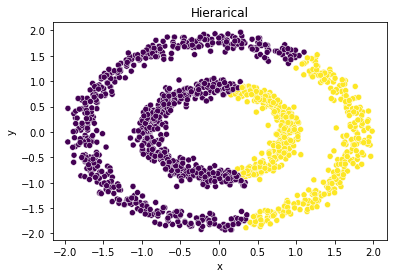

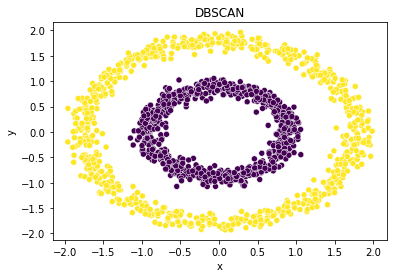

In [7]:
do_it(dataset1, kmeans_n_cluster=2, hierarical_n_cluster=2, hierarical_linkage='ward', DBSCAN_eps=0.25, DBSCAN_min_samples=5)

## Data 2

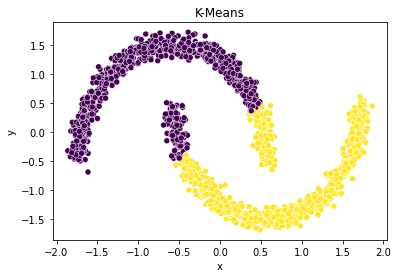

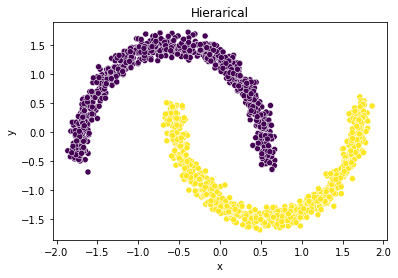

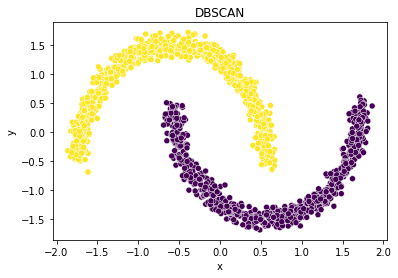

In [8]:
do_it(dataset2, kmeans_n_cluster=2, hierarical_n_cluster=2, hierarical_linkage='single', DBSCAN_eps=0.25, DBSCAN_min_samples=5)

## Data 3

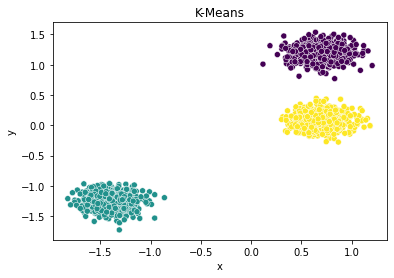

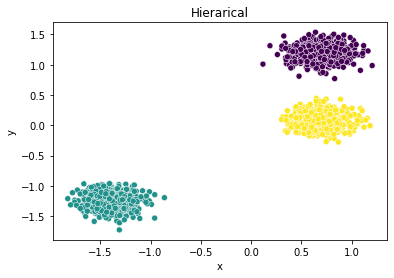

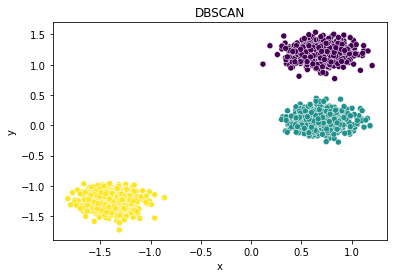

In [9]:
do_it(dataset3, kmeans_n_cluster=3, hierarical_n_cluster=3, hierarical_linkage='single', DBSCAN_eps=0.25, DBSCAN_min_samples=5)

## Data 4

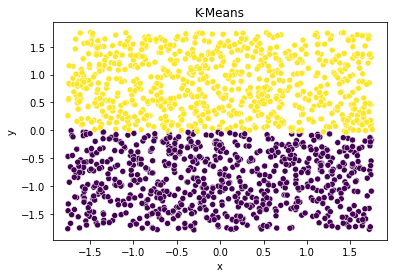

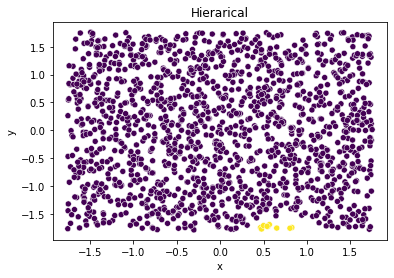

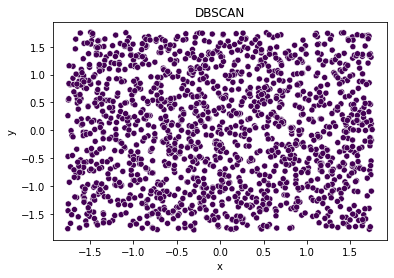

In [10]:
do_it(dataset4, kmeans_n_cluster=2, hierarical_n_cluster=2, hierarical_linkage='single', DBSCAN_eps=0.3, DBSCAN_min_samples=5)

## Data 5

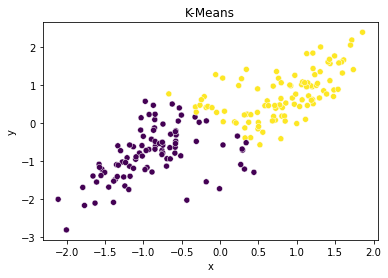

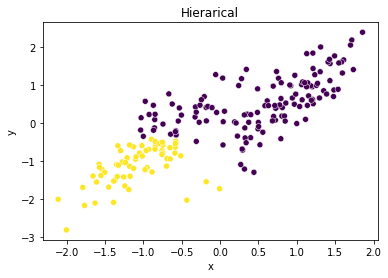

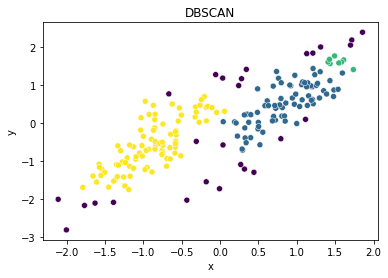

In [11]:
do_it(dataset5, kmeans_n_cluster=2, hierarical_n_cluster=2, hierarical_linkage='complete', DBSCAN_eps=0.2588, DBSCAN_min_samples=5)

## Data 6

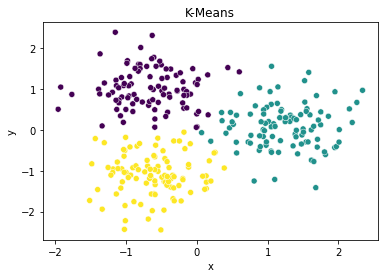

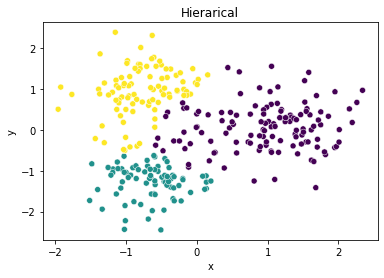

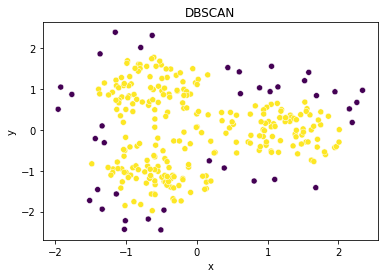

In [12]:
do_it(dataset6, kmeans_n_cluster=3, hierarical_n_cluster=3, hierarical_linkage='complete', DBSCAN_eps=0.3, DBSCAN_min_samples=5)

## Data 7

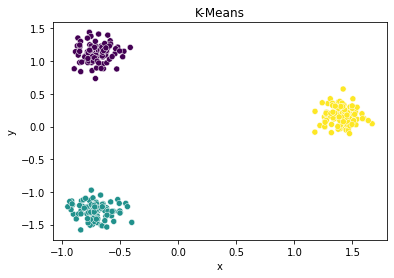

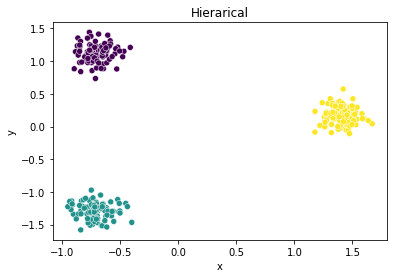

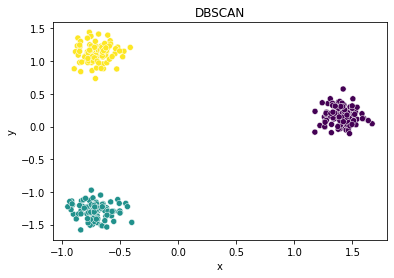

In [13]:
do_it(dataset7, kmeans_n_cluster=3, hierarical_n_cluster=3, hierarical_linkage='complete', DBSCAN_eps=0.3, DBSCAN_min_samples=5)

## Data 8

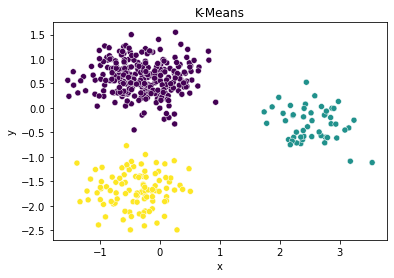

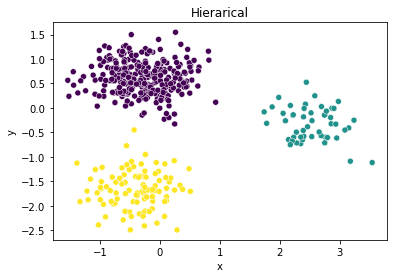

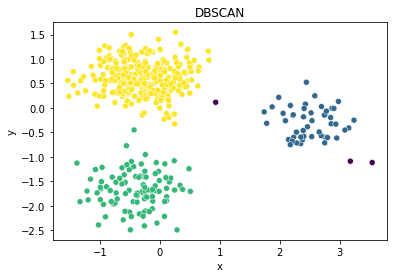

In [14]:
do_it(dataset8, kmeans_n_cluster=3, hierarical_n_cluster=3, hierarical_linkage='complete', DBSCAN_eps=0.4, DBSCAN_min_samples=5)

## Data 9

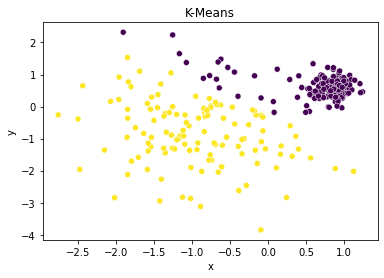

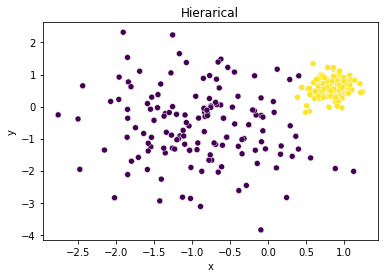

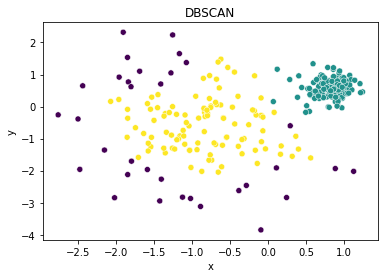

In [15]:
do_it(dataset9, kmeans_n_cluster=2, hierarical_n_cluster=2, hierarical_linkage='ward', DBSCAN_eps=0.37, DBSCAN_min_samples=5)

## Conclusion

**Dataset 1**
- Only DBSCAN can cluster the two almost concentered clusters

**Dataset 2**
- Hierarchal and DBSCAN can cluster the two clusters <br>
- Kmeans fails as it depends on clustering by circles, roughly

**Dataset 3**
- The three models could easily cluster the separated clusters

**Dataset 4**
- The data is high confusing in clustering
- Hierarchal and DBSCAN could cluster it in just one cluster

**Dataset 5**
- The data is high variance and could difficulty clustered into 2 clusters
- Only Hierarchal and KMeans can cluster into two clusters
- DBSCAN fails to cluster them

**Dataset 6**
- The data is high variance, overlapped and could difficulty clustered into 3 clusters
- Only Hierarchal and KMeans can cluster into two clusters
- DBSCAN fails to cluster them

**Dataset 7 and 8**
- The three models could easily cluster the separated clusters

**Dataset 9**
- Almost the Hierarchal colud cluster the 2 cluster well
- KMeans went wrong in some points
- DBSCAN fails to cluster them